### ENVIRONMENTAL, SOCIAL AND GOVERNANCE PROJECT

In [1]:
#Import libraries
import bamboolib as bam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Import ESG score downloaded from Kaggle
ESG = pd.read_csv("/Users/damilolaodunuga/Downloads/PC File/ALY 6060/MSCI_esg.csv")
ESG.head(4)

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
0,0921706 BC LTD,NaN,CA,Telecommunication Services,Wireless Telecommunication Services,A,6.6,10.0,7.4,2.7
1,1 MADISON OFFICE FEE LLC,NaN,US,Real Estate Management & Services,Office REITs,BBB,4.7,8.5,5.8,2.6
2,1&1 AG,1U1,DE,Telecommunication Services,Wireless Telecommunication Services,B,2.0,7.8,3.3,4.4
3,"1-800-FLOWERSCOM, INC",FLWS,US,Retail - Consumer Discretionary,Internet & Direct Marketing Retail,BBB,5.6,1.2,6.7,3.8


#### DESCRIPTIVE ANALYSIS

In [3]:
# Determine the mean, standard deviation, and interquartile range of numeric variables
ESG.describe()

,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
count,15646.000000,15646.000000,15646.000000,15646.000000
mean,5.143982,5.315371,4.617442,4.789908
std,2.333359,2.407642,1.591180,1.592997
min,0.000000,0.000000,0.000000,0.000000
25%,3.400000,3.500000,3.600000,3.800000
50%,5.300000,5.200000,4.600000,5.000000
75%,7.000000,7.000000,5.600000,6.000000
max,10.000000,10.000000,10.000000,9.800000


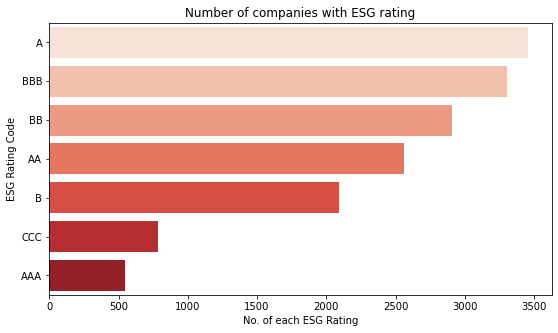

In [4]:
# Bar plot of Overall ESG Rating

overall_rate = ESG['Overall ESG RATING'].value_counts().index
plt.figure(figsize=(9, 5))
sns.countplot(data=ESG, y='Overall ESG RATING', palette='Reds', order=overall_rate)
plt.title('Number of companies with ESG rating')
plt.xlabel('No. of each ESG Rating')
plt.ylabel('ESG Rating Code');

(array([ 420.,  743., 1499., 2218., 2383., 2105., 2346., 1461., 1039.,
        1432.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

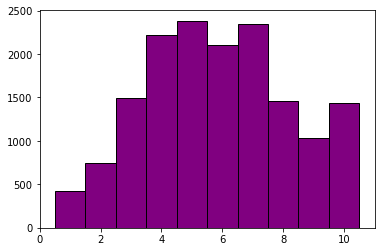

In [5]:
# Histogram plot of environmental score 
plt.hist(ESG['Environmental SCORE'], bins=10, align='right', color='purple', edgecolor='black')

[Text(0.5, 1.0, 'Actual value of Overall ESG Score')]

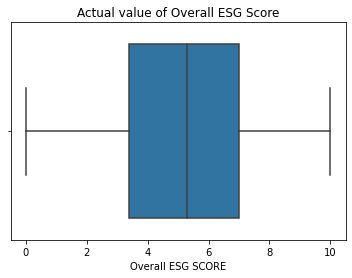

In [6]:
# Distribution plot of Overall ESG score
sns.boxplot(ESG['Overall ESG SCORE']).set(title="Actual value of Overall ESG Score")

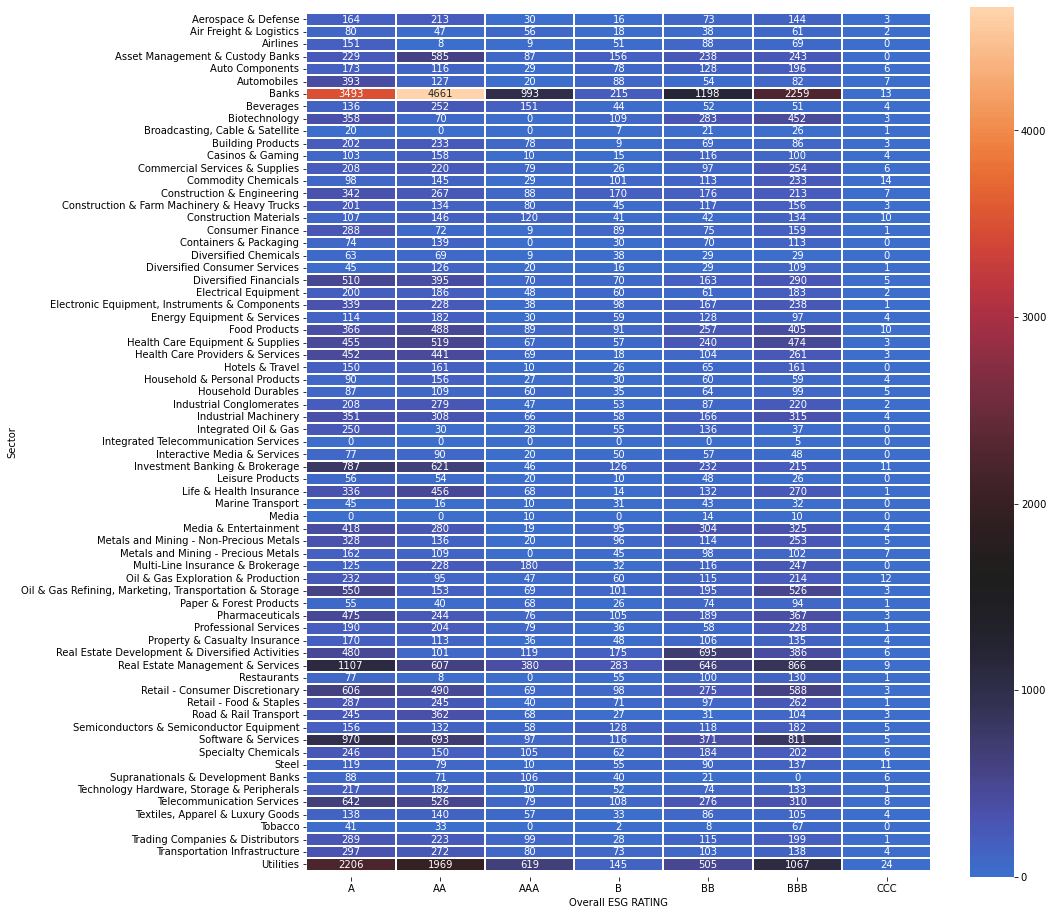

In [7]:
#Pivot table to build a heatmap between Sector and Overall ESG rating to show the highest sector with highest number based on ESG Score
pivot_table1 = pd.pivot_table(data = ESG, index = ['Sector'], columns = ['Overall ESG RATING'], values = 'Overall ESG SCORE', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[14, 16])
hm = sns.heatmap(data = pivot_table1, annot = True, fmt='.0f', linewidths=.4, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<AxesSubplot:>

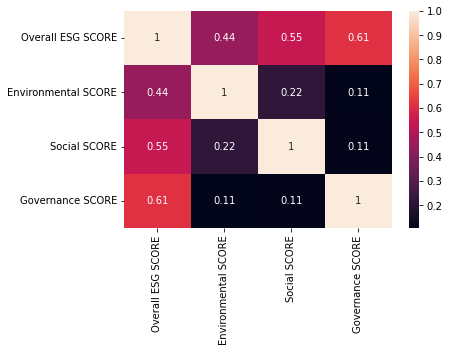

In [8]:
# Correlation plot of the numerical variables in the dataset
corelation =ESG.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

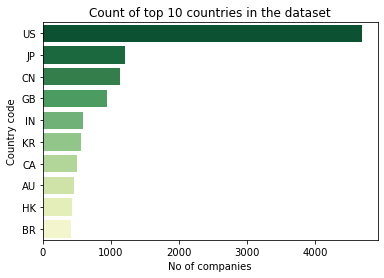

In [9]:
# Barplot of top 10 countries by company located in each countries
country = ESG['Country'].value_counts().head(10).index
plt.figure(figsize=(6, 4))
sns.countplot(data=ESG, y='Country', palette='YlGn_r', order=country)
plt.title('Count of top 10 countries in the dataset')
plt.xlabel('No of companies')
plt.ylabel('Country code');

#### DATA CLEANING: Next is data cleaning before predictive or prescriptive analysis can be done

In [10]:
ESG[['Ticker']] = ESG[['Ticker']].fillna(ESG[['Ticker']].mode().iloc[0])
ESG[['Country']] = ESG[['Country']].fillna(ESG[['Country']].mode().iloc[0])
ESG[['Subsector']] = ESG[['Subsector']].fillna(ESG[['Subsector']].mode().iloc[0])
ESG

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
0,0921706 BC LTD,BRK,CA,Telecommunication Services,Wireless Telecommunication Services,A,6.6,10.0,7.4,2.7
1,1 MADISON OFFICE FEE LLC,BRK,US,Real Estate Management & Services,Office REITs,BBB,4.7,8.5,5.8,2.6
2,1&1 AG,1U1,DE,Telecommunication Services,Wireless Telecommunication Services,B,2.0,7.8,3.3,4.4
3,"1-800-FLOWERSCOM, INC",FLWS,US,Retail - Consumer Discretionary,Internet & Direct Marketing Retail,BBB,5.6,1.2,6.7,3.8
4,"1000 AUAHI, LLC",BRK,US,Real Estate Development & Diversified Activities,Real Estate Development,A,6.8,6.1,4.1,6.9
...,...,...,...,...,...,...,...,...,...,...
15641,secunet Security Networks Aktiengesellschaft,YSN,DE,Software & Services,IT Consulting & Other Services,BB,3.1,7.0,2.9,4.1
15642,thyssenkrupp AG,TKA,DE,Steel,Steel,AA,8.4,5.3,4.9,6.2
15643,transcosmos inc,9715,JP,Software & Services,Data Processing & Outsourced Services,B,1.9,7.0,3.2,1.5
15644,u-blox Holding AG,UBXN,CH,Semiconductors & Semiconductor Equipment,Semiconductors,A,6.1,3.6,5.5,6.9


In [11]:
#Import data transformation tool using label encoding
from sklearn.preprocessing import LabelEncoder

In [12]:
# Transform categorical data using label encoding

labelencoder = LabelEncoder()
ESG["Ticker"] = labelencoder.fit_transform(ESG["Ticker"])
ESG["Country"] = labelencoder.fit_transform(ESG["Country"])
ESG["Sector"] = labelencoder.fit_transform(ESG["Sector"])
ESG["Subsector"] = labelencoder.fit_transform(ESG["Subsector"])

In [13]:
ESG.head(5)

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
0,0921706 BC LTD,3713,14,63,158,A,6.6,10.0,7.4,2.7
1,1 MADISON OFFICE FEE LLC,3713,101,52,110,BBB,4.7,8.5,5.8,2.6
2,1&1 AG,780,24,63,158,B,2.0,7.8,3.3,4.4
3,"1-800-FLOWERSCOM, INC",5050,101,54,92,BBB,5.6,1.2,6.7,3.8
4,"1000 AUAHI, LLC",3713,101,51,127,A,6.8,6.1,4.1,6.9


#### PREDICTIVE ANALYSIS - LOGISTIC REGRESSION

In [14]:
# Dependent variable (target) and independent variable (main)

main = pd.DataFrame(ESG, columns=['Ticker', 'Country', 'Sector', 'Subsector', 'Environmental SCORE',
                                 'Social SCORE', 'Governance SCORE'])
target = pd.DataFrame(ESG['Overall ESG SCORE'])
display(main.head())
display(target.head())

,Ticker,Country,Sector,Subsector,Environmental SCORE,Social SCORE,Governance SCORE
0,3713,14,63,158,10.0,7.4,2.7
1,3713,101,52,110,8.5,5.8,2.6
2,780,24,63,158,7.8,3.3,4.4
3,5050,101,54,92,1.2,6.7,3.8
4,3713,101,51,127,6.1,4.1,6.9


,Overall ESG SCORE
0,6.6
1,4.7
2,2.0
3,5.6
4,6.8


In [15]:
# Split train and test set
from sklearn.model_selection import train_test_split
main_train, main_test, target_train, target_test = train_test_split(main, target, random_state=1)
display(len(main_train))
display(len(main_test))
display(target_train.sum())
display(target_test.sum())

11734

3912

Overall ESG SCORE    60355.02
dtype: float64

Overall ESG SCORE    20127.73
dtype: float64

#### Using linear regression imported from sklearn

In [16]:
# Import Linear regression
from sklearn.linear_model import LinearRegression

# fitting the model
logreg = LinearRegression()
mod = logreg.fit(main, target)
mod

LinearRegression()

In [17]:
# R squared of model
r_sq = mod.score(main, target)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6999433358513242


In [18]:
# Determine the coefficent of independent variables
print(f"coefficients: {mod.coef_}")

coefficients: [[-5.69689179e-06 -2.73896735e-03 -9.40930538e-03 -8.25098826e-04
   2.81095414e-01  6.33934285e-01  7.90701853e-01]]


In [19]:
# Predict y using independent variable
Y_pred = mod.predict(main)
Y_pred


array([[6.36929699],
       [4.75910577],
       [4.48526897],
       ...,
       [1.96683762],
       [6.72756002],
       [5.79662651]])

In [20]:
# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target, Y_pred)
print(f"mean squared error: {mse}")

mean squared error: 1.6335730121597496


[Text(0.5, 1.0, 'Predicted Value of Overall ESG Score')]

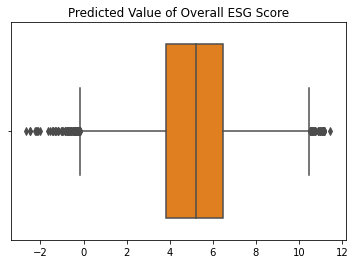

In [21]:
# Plot of predicted value of Overall ESG Score from y_pred
sns.boxplot(Y_pred, palette="Set1_r").set(title="Predicted Value of Overall ESG Score")